## ***MACHINE LEARNING-[22AIE213]***
## **END SEMISTER PROJECT**

## **Batch-B**

### **MC DHANUSH      -[CB.EN.U4AIE22130]**


## **BoardGameGeek**
#### BoardGameGeek is a very popular site where different types of board games are discussed and reviewed.

#### In this project, we have a dataset containing 80,000 board games and their corresponding review scores. These data was scraped from BoardGameGeek. The data contains rows and columns, Each row represnets a single board game and has statiistics about the board game as well as review information. Some of the columns are:

Name: The name of the board game

Playingtime: the playing time (given by the manufacturer).

minplaytime: the minimum playing time (given by the manufacturer).

maxplaytime: the maximum playing time (given by the manufacturer).

minage: the minimum recommended age to play.

users_rated: the number of users who rated the game.

average_rating: the average rating given to the game by users. (0-10)

total_weights:Number of weights given by users. Weight is a subjective measure that is made up by BoardGameGeek. It describes how "deep" or involved a game is.

average_weight: the average of all the subjective weights (0-5).


## **The aim of this project is to predict average_rating.** 

## The necessary packages are imported.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from collections import Counter #An unordered collection like Dictionary
import sklearn.tree as tree  #Create a tree
from sklearn.linear_model import LinearRegression #For performing Linear Regression

## **READING THE DATA**
#### The data is loaded into ‘df’ dataframe.

In [2]:
df = pd.read_csv('games2.csv')


## **UNDERSTANDING THE DATA**
#### Understanding the data is important as we get an intuitive feeling for the data, check for missing values, check for incorrect data, check for incorrect relationships between variables which will help us to decide the necessary preprocessing steps. The preprocessing steps have been identified and given in bold lines.

In [3]:
df.shape # Displays the shape of 'df'

(81312, 20)

#### The ‘df’ dataframe is of shape (81312,20) which implies 81312 cases and 20 columns.

In [4]:
df.head() # Displays first five rows of ‘df’.


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


#### The column names are [‘id’, ‘type’, ‘name’, ‘yearpublished’, ‘minplayers’, ‘maxplayers’, ‘playingtime’, ‘minplaytime’, ‘maxplaytime’, ‘minage’, users_rated’, ‘average_rating’, ‘bayes_average_rating’, ‘total_owners’,‘total_traders’, ‘total_wanters’, ‘total_wishers’, ‘total_comments’,‘total_weights’, ‘average_weight’]

#### The objective is to predict ‘average_rating’ of board games. The columns [‘id’ , ‘name’ ] can be dropped as they don’t influence ‘average_rating’. The column ‘bayes_average_rating’ can be dropped too as it is calculated using ‘average_rating’ and doesn’t influence ‘average_rating’.

In [5]:
df.nunique() # Displays total number of unique elements in each column.


id                      79463
type                        2
name                    76035
yearpublished             323
minplayers                 24
maxplayers                 89
playingtime               134
minplaytime               123
maxplaytime               134
minage                     35
users_rated              2147
average_rating          17564
bayes_average_rating    12681
total_owners             2995
total_traders             407
total_wanters             540
total_wishers            1130
total_comments           1216
total_weights             657
average_weight           3376
dtype: int64

#### It can be observed that ‘type’ is the only categorical variable which takes on 2 values. A categorical variable is a variable that can take on one of the fixed number of values. The value can be numeric or string or any other data type. If it is non numeric data type, it is ‘one hot encoded’ as only numeric data types are allowed in the input/output of machine learning algorithms. One hot encoding will be covered in subsequent article.

In [6]:
df['type'].unique() # Prints the unique values in ‘type’ column


array(['boardgame', 'boardgameexpansion'], dtype=object)

#### The 2 unique values in ‘type’ column are [‘boardgame’, boardgameexpansion’]. The values doesn’t seem to influence the output ‘average_rating’ and is not of much use. Hence the ‘type’ column can be dropped.


In [7]:
df.describe() # Displays properties of each column


,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


#### It can be observed from ‘count’ that not all columns have row count = 81312 which suggests there are missing values. But the number of missing values is very less when compared to the row count = 81312. Hence all rows which have at least one missing value can be dropped.

#### If it was the case of too many missing values in a column, the entire column can be dropped. If it was the case of a small number of missing values in a column, only the rows that have missing values can be dropped. If it was the case of a moderate (neither very high nor too low) number of missing values, the column has to be preprocessed to fill in the empty values such as replacing empty values with average value of column or any other preprocessing step depending on the column and problem set given.

#### It can also be observed that minimum value of ‘users_rated’ is 0 which suggests there can be board games which were not rated by any of the users. Let us look at the board games which were not rated by any of the users.


(array([24380.,     0., 11306.,     0.,  6089.,     0.,  3970.,     0.,
         2818.,  2219.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

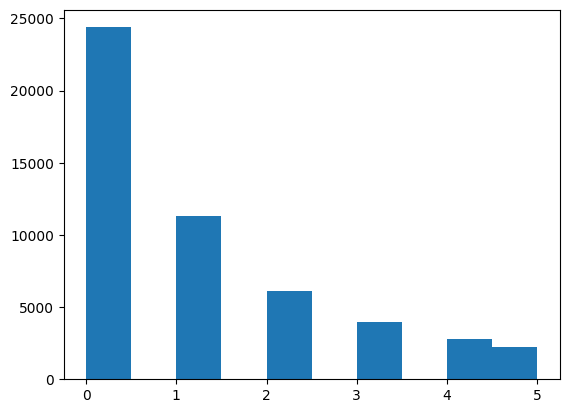

In [8]:
plt.hist(df['users_rated'],range = (0,5)) # Histogram of ‘users_rated’ column.

#### A significant proportion of board games have ‘users_rated’ = 0. Let us look at the ‘average_rating’ of board games which were not rated by any of the users.

In [9]:

df[df['users_rated'] == 0]['average_rating'].describe()# Prints the properties of ‘average_rating’ column of board games which were not rated by any of the users.


count    24380.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: average_rating, dtype: float64

In [10]:
df[(df['maxplayers'] == 0) | (df['maxplaytime'] == 0)] # Displays the rows when either of mentioned variables is 0.

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
657,160902,boardgame,Dungeons & Dragons Dice Masters: Battle for Faern,2015.0,2.0,2.0,0.0,60.0,0.0,14.0,621,7.82241,6.57014,1941,85,73,185,150,45,2.0889
929,153016,boardgame,Telestrations: 12 Player Party Pack,2011.0,4.0,12.0,0.0,0.0,0.0,12.0,413,7.88981,6.37987,966,6,54,131,80,14,1.0000
1211,37301,boardgame,Decktet,2008.0,0.0,0.0,30.0,30.0,30.0,0.0,366,7.58172,6.22832,1157,42,46,225,256,29,1.9655
1342,52328,boardgame,Malifaux,2009.0,2.0,2.0,0.0,0.0,0.0,0.0,338,7.66586,6.16904,680,22,25,78,104,36,3.2500
1516,29285,boardgame,Case Blue,2007.0,1.0,2.0,0.0,0.0,0.0,12.0,224,8.26528,6.09953,572,3,116,323,113,66,4.5758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81294,184349,boardgame,"The Luzon Campaign, 1945",2018.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81299,184368,boardgame,Bone Head,2015.0,2.0,9.0,0.0,0.0,0.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,60.0,0.0,18.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


#### There are 20675 such cases where at least one of [‘maxplayers’,’maxplaytime] is 0. This information should have been given by the board game manufacturer. One preprocessing step would be to scrape data from other sources and replace with correct values for [‘maxplayers’, ‘maxplaytime’] for each of these 20675 cases. But to avoid complexity, we would stick with no preprocessing.


#### As we have minimum and maximum values in the dataframe, it is good to check whether all maximum values are greater than all minimum values.

In [11]:
df[df['minplayers'] > df['maxplayers']].count() # Displays count of rows where ‘minplayers’ > ‘maxplayers’

id                      4020
type                    4020
name                    4019
yearpublished           4020
minplayers              4020
maxplayers              4020
playingtime             4020
minplaytime             4020
maxplaytime             4020
minage                  4020
users_rated             4020
average_rating          4020
bayes_average_rating    4020
total_owners            4020
total_traders           4020
total_wanters           4020
total_wishers           4020
total_comments          4020
total_weights           4020
average_weight          4020
dtype: int64

#### There are 4020 cases where 'minplayers' > 'maxplayers'.

In [12]:
df[df['minplaytime'] > df['maxplaytime']].count() # Displays count of rows where ‘minplaytime’ > ‘maxplaytime’

id                      600
type                    600
name                    600
yearpublished           600
minplayers              600
maxplayers              600
playingtime             600
minplaytime             600
maxplaytime             600
minage                  600
users_rated             600
average_rating          600
bayes_average_rating    600
total_owners            600
total_traders           600
total_wanters           600
total_wishers           600
total_comments          600
total_weights           600
average_weight          600
dtype: int64

### There are 600 cases where ‘minplaytime’ > ‘maxplaytime’.

#### The minimum values are greater than maximum values due to some error while preparing the data. The preprocessing step would be to swap ‘minplayers’ with ‘maxplayers’ and ‘minplaytime’ with ‘maxplaytime’ for the above cases.

#### **Summary** :- The necessary preprocessing steps have been identified. The columns [‘id’, ‘name’, ‘bayes_average_rating’, ‘type’] are to be dropped. The rows with missing values are to be dropped. The rows with ‘users_rated’ = 0 are to be dropped. Swapping is to be done for the rows with ‘minplayers’ > ‘maxplayers’ and ‘minplaytime’ > ‘maxplaytime’.

## **PREPROCESSING THE DATA**
#### We carry out the preprocessing steps that have been identified in ‘understanding the data’ section.

#### 1. The columns [‘id’, ‘type’, ‘name’, ‘bayes_average_rating’] are to be dropped.

In [13]:
df.drop(['id','type','name','bayes_average_rating'],axis = 1,inplace = True)

#### 2. The rows with missing values are to be dropped.

In [14]:
df.dropna(axis = 0,inplace = True)

#### 3. The rows with ‘users_rated’ = 0 are to be dropped.

In [15]:
df.drop(df[df['users_rated'] == 0].index,inplace = True)

#### 4. Swapping is to be done for rows with ‘minplayers’ > ‘maxplayers’ and ‘minplaytime’ > ‘maxplaytime’

In [16]:
a = (df['minplayers'] > df['maxplayers']) 
df.loc[a,['minplayers','maxplayers']] = df.loc[a, ['maxplayers','minplayers']].values

b = (df['minplaytime'] > df['maxplaytime'])
df.loc[b,['minplaytime','maxplaytime']] = df.loc[b,['maxplaytime','minplaytime']].values

## **VISUALIZING THE DATA**
#### We check the correlation between variables in ‘df’. Correlation is any statistical relationship ( causal or not) between 2 random variables though it commonly refers to the degree to which a pair of variables are linearly related.

<Axes: >

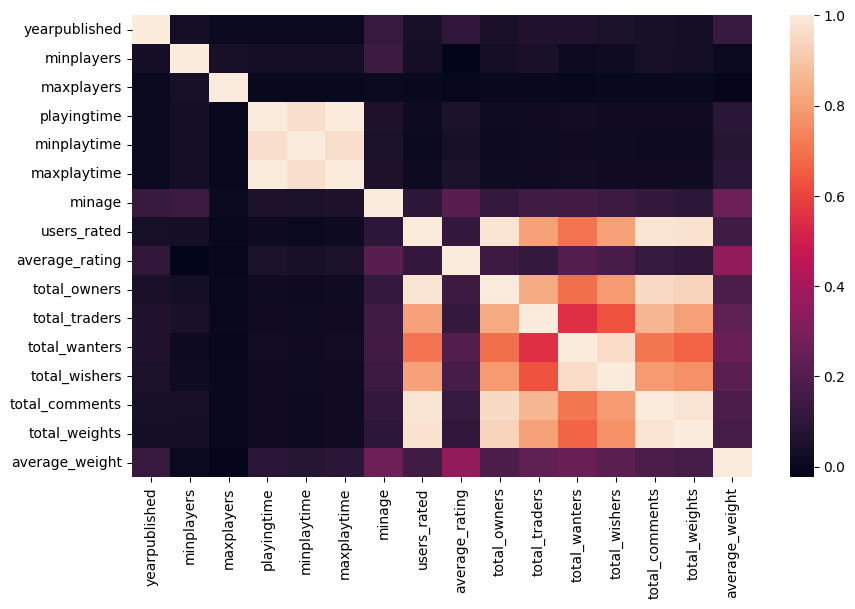

In [17]:
plt.figure(figsize = (10,6)) # Adjusting figure size.
sns.heatmap(df.corr()) # Displays heatmap of correlations between variables in ‘df’.

#### The light shaded areas are highly correlated. It can be observed that ‘average_rating’ has relatively high correlation with ‘minage’, ‘total_wanters’ and ‘average_weight’.

#### ‘total_owners’, ‘total_traders’, ‘total_wanters’, ‘total_wishers’, ‘total_comments’ and ‘total_weights’ have good correlation among themselves which is expected as each of these variables are directly proportional to demand value of a board game.

#### ‘playtime’, ‘minplaytime’ and ‘maxplaytime’ have good correlation among themselves which is expected as each of these variables are related to playing time of a board game.

#### Since ‘average_rating’ has relatively high correlation with ‘minage’, ‘total_wanters’ and ‘average_weight’, we would focus on these variables.

c:\Users\Dhanush MC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


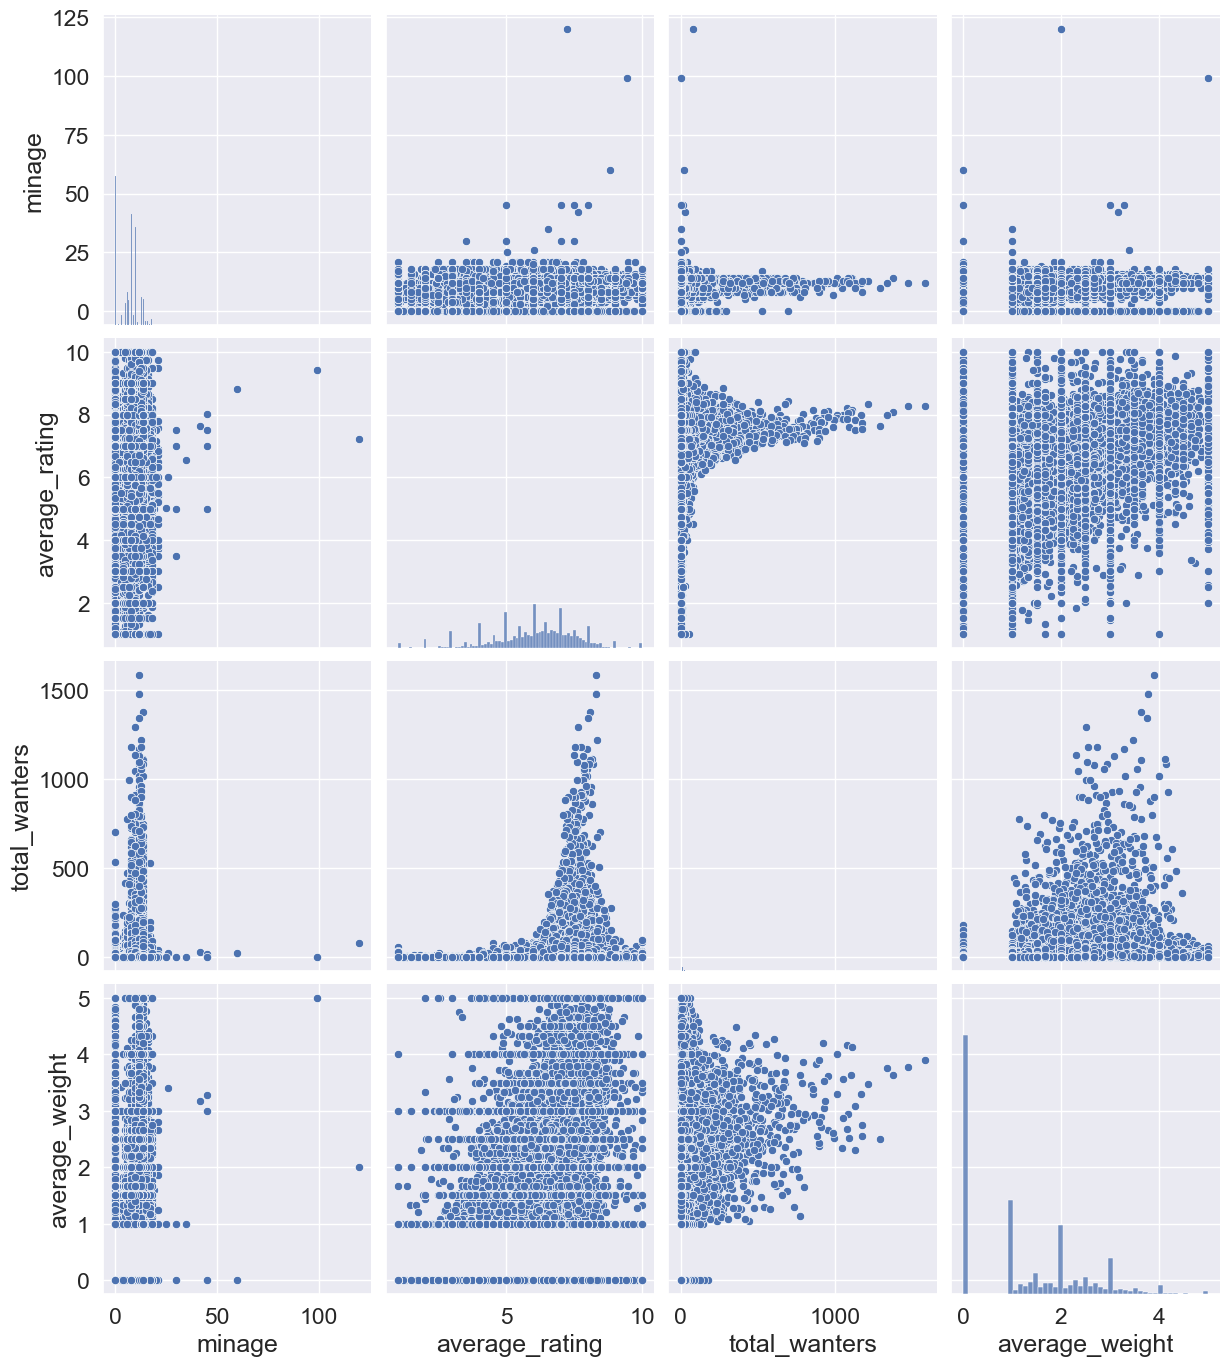

In [18]:
sns.set(font_scale = 1.5)
sns.pairplot(df[['minage','average_rating','total_wanters','average_weight']],height = 3.5,aspect = 0.9)

#### In ‘total_wanters’ vs ‘minage’ graph, it can be observed that ‘total_wanters’ is high for board games with ‘minage’ between 10 and 20. This implies many people prefer board games designed for teens.

#### A new column called ‘new_users_rated’ is defined. ‘new_users_rated’ = 1 if ‘users_rated’ > df[‘users_rated’].mean() and 0 otherwise.

<Axes: xlabel='average_rating', ylabel='total_wanters'>

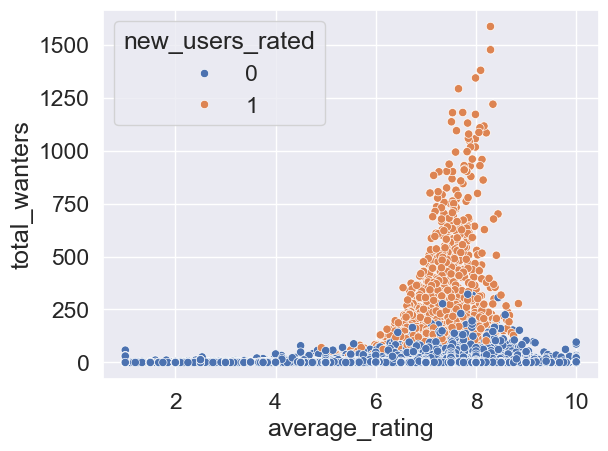

In [19]:
df['new_users_rated'] = df['users_rated'].apply(lambda x: 1 if x > df['users_rated'].mean() else 0)
sns.scatterplot(x='average_rating', y='total_wanters', data=df, hue='new_users_rated', legend='full')

#### ‘users_rated’ is high for board games with ‘average_rating’ between 6 and 9. ‘total_wanters’ is high for board games with ‘average_rating’ around 8 which is sensible as people would desire to have board games which have high ratings.

## **Is it right to compare board games based on ratings alone?**
#### The ‘users_rated’ must also be considered before making a decision. It may be that board games with high ‘average_rating’ had less number of ‘users_rated’ which makes the ‘average_rating’ biased.

#### A new column called ‘new_users_rated’ is defined. ‘new_users_rated’ = 1 if ‘users_rated’ > 5000 and 0 otherwise

<Axes: xlabel='average_rating', ylabel='users_rated'>

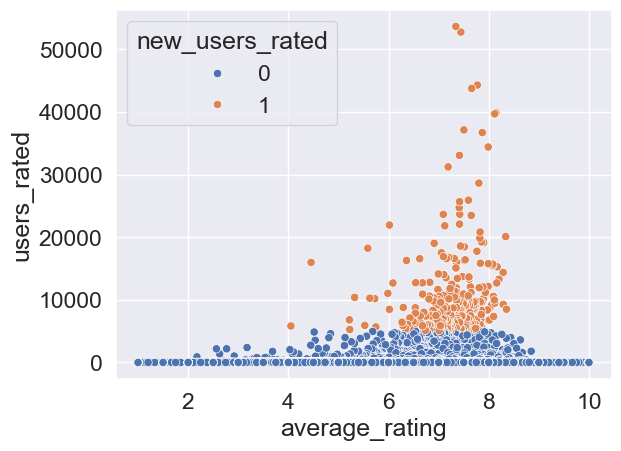

In [21]:
df['new_users_rated'] = df['users_rated'].apply(lambda x: 1 if x > 5000 else 0)
sns.scatterplot(x='average_rating', y='users_rated', data=df, hue='new_users_rated')

### The preferred board game would be the one with highest ‘average_rating’ in the group of orange points(‘users_rated’ > 5000).

## **TRAINING THE MODEL**
#### The data set has been preprocessed and is ready to be trained. A comparison is made between 2 models :- Linear Regression & Random Forest Regression.

## **Comparison of Linear Regression and Random Forest Regression**

#### The comparison is made based on the cross validation score. The given training set is divided into 2 sets :- ‘Train_set’ and ‘Test_set’. The model is trained using a portion of ‘Train_set’. Cross validation score is calculated based on performance of trained model in remaining portion of ‘Train_set’.

#### There are various cross validation techniques which will be discussed later. Here K-Fold cross validation technique is used.

#### The training set is split into ‘Train_set’ and ‘Test_set’.

In [22]:
X = df.drop('average_rating', axis=1) # X is input
y = df['average_rating'] # y is output
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) # Splitting into Train_set and Test_set

## **Cross validation scores are calculated for both models.**

In [23]:
validation_type = model_selection.KFold(n_splits = 10) # K-Fold cross validation technique is used.

cross_validation_result1 = model_selection.cross_val_score(LinearRegression(),X_train,y_train,cv = validation_type,scoring = 'neg_mean_squared_error')  # Cross validation score of SVC model.

cross_validation_result2 = model_selection.cross_val_score(RandomForestRegressor(),X_train,y_train,cv = validation_type,scoring = 'neg_mean_squared_error') # Cross validation score of KNN model.

print(cross_validation_result1.mean(),cross_validation_result2.mean())


-2.0970979279760407 -1.491527313060754


### Cross validation score of Linear Regression model = -2.106

### Cross validation score of Random Forest Regressor model = -1.492

### The negative of mean squared error is calculated above. So the mean sqaured error of Linear Regression model and Random Forest Regressor model are 2.106 and 1.492 respectively.

### The performance of Random Forest Regressor model on given data set is expected to be better than Linear Regression model. Let us verify this by training using ‘Train_set’ and testing using ‘Test_set’.

## **Performance of Linear Regression model**

In [24]:
a = LinearRegression().fit(X_train,y_train) # Fitting the model.
predictions = a.predict(X_test) # Test set is predicted.
print(mean_squared_error(y_test,predictions)) # Mean squared error is calculated.

2.103357637541149


### The mean squared error is 2.103

## **Performance of Random Forest Regressor model**

In [25]:
b = RandomForestRegressor().fit(X_train,y_train) # Fitting the model.
predictions = b.predict(X_test) # Test set is predicted.
print(mean_squared_error(y_test,predictions)) # Mean squared error is calculated.

1.5068694671698837


### The mean squared error is 1.462

### As expected the performance of Random Forest Regressor model is better than Linear Regression model for the given data set. This is because the board game data set is very large and it is difficult for the Linear Regression model to fit the data by a straight line.

## **Prediction using trained model**

### The trained Random Forest Regressor model is used for prediction of ‘average_rating’ of 2 randomly selected board games from data set.

In [26]:
prediction = b.predict(df.iloc[[55, 96]].drop('average_rating', axis=1))
print(prediction)

[7.7294351 7.6151689]


### The predicted ‘average_ratings’ of 55th and 96th board games in data set are [7.7380353 7.6425094]

In [27]:
df.iloc[[55,96]]['average_rating'] # Actual average ratings.


55    7.74070
96    7.65777
Name: average_rating, dtype: float64

### The actual ‘average_ratings’ of 55th and 96th board games in data set are [7.74070 7.65777].

### The predicted ‘average_ratings’ are very close to the actual ‘average_ratings’. The Random Forest Regressor model has been trained well.